<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/master/04%20Deep%20Learning/notebooks/P4-MLP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Clasificación y Regresión con redes MLP y CNN</h1>

En esta notebook practicaremos el uso de las redes CNN en varios conjuntos de datos y realizaremos algunas comparaciones con las redes MLP.

Verifiquemos que el entorno de ejecución en Colab sea GPU

In [ ]:
import tensorflow as tf

print('GPU presente en: {}'.format(tf.test.gpu_device_name()))

GPU presente en: /device:GPU:0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

# 1. MNIST Fashion

## El conjunto de datos

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:
 <ul>
  <li>0 T-shirt/top</li>
  <li>1 Trouser</li>
  <li>2 Pullover</li>
  <li>3 Dress</li>
  <li>4 Coat</li>
  <li>5 Sandal</li>
  <li>6 Shirt</li>
  <li>7 Sneaker</li>
  <li>8 Bag</li>
  <li>9 Ankle boot</li>
</ul>

Creamos un diccionario con los nombres de las clases

In [ ]:
prendas_list = ['Camiseta','Pantalones','Suéter','Vestido','Abrigo','Sandalia','Camisa','Sneaker','Bolsa','Botín']

prendas = dict(enumerate(prendas_list))
prendas

{0: 'Camiseta',
 1: 'Pantalones',
 2: 'Suéter',
 3: 'Vestido',
 4: 'Abrigo',
 5: 'Sandalia',
 6: 'Camisa',
 7: 'Sneaker',
 8: 'Bolsa',
 9: 'Botín'}

Cargamos del dataset

In [ ]:
from keras.datasets import fashion_mnist

(X_train, y_train_classes), (X_test, y_test_classes) = fashion_mnist.load_data()

print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train_classes.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test_classes.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X train shape: (60000, 28, 28)
y train shape: (60000,)
X test shape: (10000, 28, 28)
y test shape: (10000,)


Veamos la distribución de clases

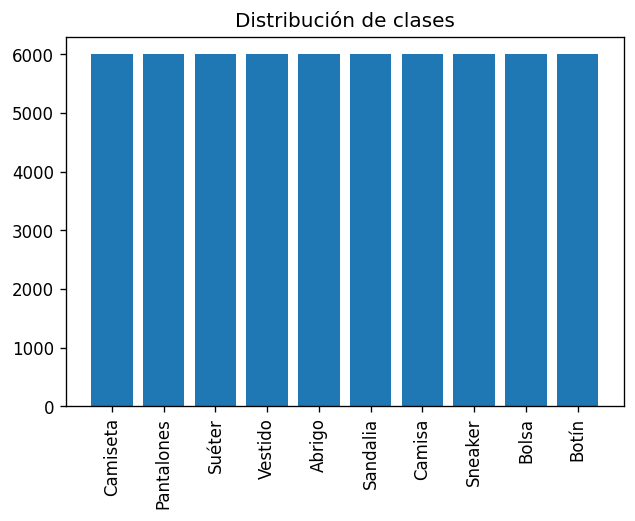

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

clases, conteos = np.unique(y_train_classes, return_counts=True)

plt.figure(figsize=(6,4),dpi=120)
plt.bar(clases, conteos)
plt.xticks(clases,list(prendas.values()), rotation=90, ha='center')
plt.title("Distribución de clases")
plt.show()

## 🟢 Preprocesamiento y Separación

Obtenemos las clases como vectores *one-hot*. A partir de aquí, tenemos dos versiones de las etiquetas:

* `y_train_classes`, `y_test_classes`: Vectores de clases, cada etiqueta es un número entero positivo indicando la clase a la que pertenece la instancia.
* `y_train`, `y_test`: Matrices de clases, cada etiqueta es un vector *one-hot* indicando a qué clase pertenece cada instancia.

Parte de la práctica es saber cuándo usar cada versión.

In [ ]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train_classes, num_classes)
y_test = to_categorical(y_test_classes, num_classes)

Re-escalamos

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Dividimos en train-validation-split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  stratify=y_train_classes,
                                                  test_size=0.15,
                                                  random_state=42)

print('Train size:', X_train.shape)
print('Validation size:', X_val.shape)
print('Test size:', X_test.shape)

Train size: (51000, 28, 28)
Validation size: (9000, 28, 28)
Test size: (10000, 28, 28)


Visualicemos algunas imágenes

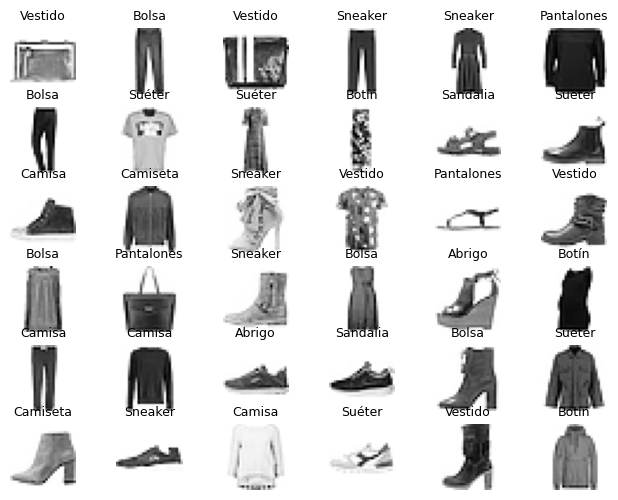

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# tamaño del conjunto de instancias
m = y_train.shape[0]

# Elegimos algunas instancias al azar para mostrar
random_idxs = np.random.choice(m, 36, replace=False)
images = X_train[random_idxs, :, :].reshape((6,6,28,28))
images_labels = y_train_classes[random_idxs].reshape((6,6))

# visualización de las imágenes
fig, axs = plt.subplots(6,6,figsize=(8,6))
for i in range(6):
    for j in range(6):
        axs[i,j].imshow(images[i,j], cmap='Greys')
        axs[i,j].set_title(prendas[images_labels[i,j]], fontsize=9)
        axs[i,j].axis('off')
fig.show()

## ⭕ Práctica 1

* Entrenar una red MLP para clasificar este conjunto de entrenamiento. Puedes escoger libremente el número de capas, neuronas, funciones de activación, optimizador y épocas. Usa la métrica accuracy. Ten cuidado con el sobre-entrenamiento. **Recuerda que la capa de entrada y la de salida están fijas**. No olvides incluir una capa flatten.
* Grafica las curvas de entrenamiento.
* Reportar el accuracy y la función de pérdida en el conjunto de prueba. Para esto, usa el método `evaluate`.
* Muestra la matriz de confusión.

Matriz de confusión

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input

model_mlp = Sequential()
model_mlp.add(Input(shape=(28,28)))
model_mlp.add(Flatten())
model_mlp.add(Dense(32, activation='relu'))
model_mlp.add(BatchNormalization())
model_mlp.add(Dense(16, activation='relu'))
model_mlp.add(BatchNormalization())
model_mlp.add(Dense(10, activation='softmax'))

model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,010 (101.60 KB)

 Trainable params: 25,914 (101.23 KB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
model_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
!pip install -qq visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 61.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


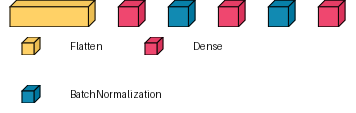

In [ ]:
from visualkeras import layered_view

layered_view(model_mlp,
            legend=True,draw_funnel=False,
            draw_volume=True,spacing=30)

In [ ]:
n_epochs = 10

history = model_mlp.fit(X_train, y_train,
          batch_size=32,
          epochs=n_epochs,
          validation_data=(X_val, y_val))

loss, accuracy_score = model_mlp.evaluate(X_test, y_test, verbose=2)

print(f"Accuracy para las predicciones en el conjunto de prueba: {np.round(accuracy_score,4)} MPG")

Epoch 1/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7411 - loss: 0.7921 - val_accuracy: 0.8321 - val_loss: 0.4704
Epoch 2/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8394 - loss: 0.4499 - val_accuracy: 0.8099 - val_loss: 0.5219
Epoch 3/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8532 - loss: 0.4110 - val_accuracy: 0.8617 - val_loss: 0.3793
Epoch 4/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8630 - loss: 0.3827 - val_accuracy: 0.8704 - val_loss: 0.3656
Epoch 5/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8618 - loss: 0.3811 - val_accuracy: 0.8641 - val_loss: 0.3778
Epoch 6/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8694 - loss: 0.3578 - val_accuracy: 0.8639 - val_loss: 0.3750
Epoch 7/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8717 - loss: 0.3501 - val_accuracy: 0.8577 - val_loss: 0.3949
Epoch 8/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8739 - loss: 0.3430 -

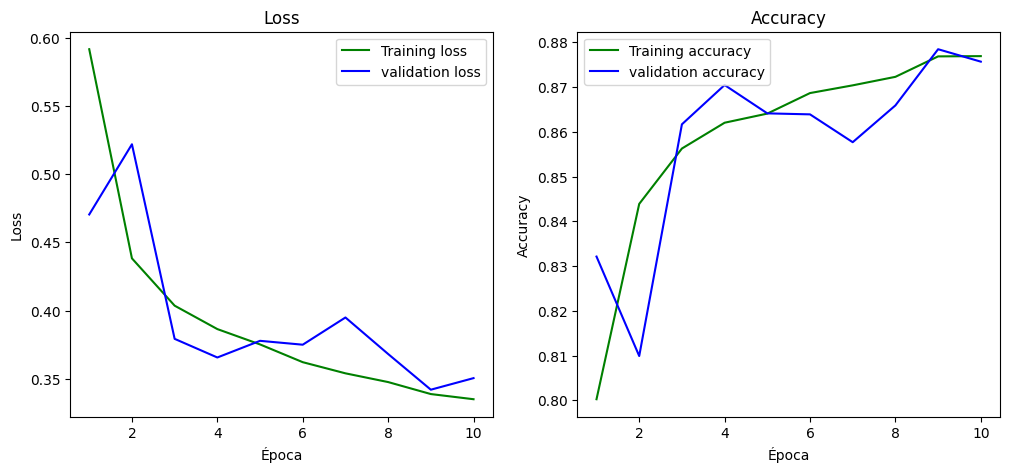

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']

epochs = range(1,n_epochs+1)

fig, axs = plt.subplots(1,2,figsize=(12,5))
axs[0].plot(epochs, loss_train, 'g', label='Training loss')
axs[0].plot(epochs, loss_val, 'b', label='validation loss')
axs[0].title.set_text('Loss')
axs[0].set(xlabel="Época", ylabel="Loss")
axs[0].legend()
axs[1].plot(epochs, acc_train, 'g', label='Training accuracy')
axs[1].plot(epochs, acc_val, 'b', label='validation accuracy')
axs[1].title.set_text('Accuracy')
axs[1].set(xlabel="Época", ylabel="Accuracy")
axs[1].legend()

fig.show()

🟢 Grafica la matriz de confusión

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


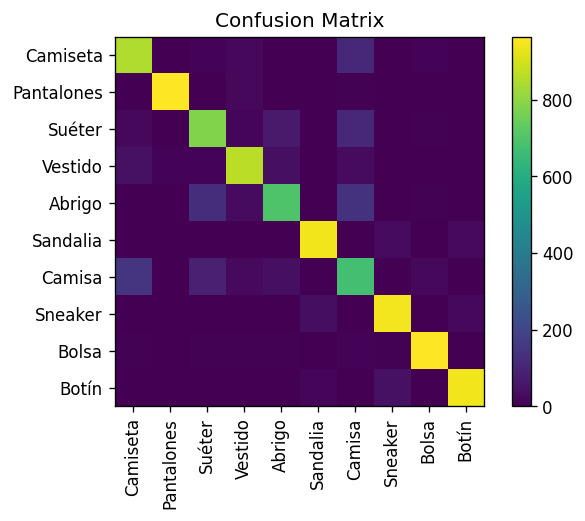

In [ ]:
from sklearn.metrics import confusion_matrix

y_hat = model_mlp.predict(X_test)

y_pred = np.argmax(y_hat, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred)

plt.figure(figsize=(6,4),dpi=120)
plt.imshow(conf_matrix)
plt.xticks(list(prendas.keys()),list(prendas.values()), rotation=90, ha='center')
plt.yticks(list(prendas.keys()),list(prendas.values()))
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

## ⭕ Práctica 2

* Entrenar una red MLP para clasificar este conjunto de entrenamiento. Puedes escoger libremente el número de capas, neuronas, funciones de activación, optimizador y épocas. Usa la métrica accuracy. Ten cuidado con el sobre-entrenamiento. **Recuerda que la capa de entrada y la de salida están fijas**.
* Grafica las curvas de entrenamiento.
* Reportar el accuracy y la función de pérdida en el conjunto de prueba. Para esto, usa el método `predict`.
* Muestra la matriz de confusión.
* Compara el rendimiento de la MLP y la CNN.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Input

model_cnn = Sequential()
model_cnn.add(Input(shape=(28,28,1)))
model_cnn.add(Conv2D(32, 3, activation='relu', padding='same', strides=1))
model_cnn.add(MaxPooling2D())
model_cnn.add(Conv2D(64, 3, activation='relu', padding='same', strides=1))
model_cnn.add(MaxPooling2D())
model_cnn.add(Conv2D(128, 3, activation='relu', padding='same', strides=1))
model_cnn.add(MaxPooling2D())
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam

model_cnn.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=1e-6)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

history = model_cnn.fit(X_train, y_train,
                        batch_size=64,
                        epochs=100,
                        validation_data=(X_val, y_val),
                        callbacks=[reduce_lr, early_stopping])

Epoch 1/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5681 - loss: 1.2337 - val_accuracy: 0.8156 - val_loss: 0.5140 - learning_rate: 1.0000e-04
Epoch 2/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8172 - loss: 0.5026 - val_accuracy: 0.8496 - val_loss: 0.4258 - learning_rate: 1.0000e-04
Epoch 3/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8474 - loss: 0.4280 - val_accuracy: 0.8594 - val_loss: 0.3899 - learning_rate: 1.0000e-04
Epoch 4/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8619 - loss: 0.3847 - val_accuracy: 0.8721 - val_loss: 0.3534 - learning_rate: 1.0000e-04
Epoch 5/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8723 - loss: 0.3564 - val_accuracy: 0.8806 - val_loss: 0.3361 - learning_rate: 1.0000e-04
Epoch 6/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8792 - loss: 0.3369 - val_accuracy: 0.8857 - val_loss: 0.3200 - learning_rate: 1.0000e-04
Epoch 7/100
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[4.7427342e-08, 3.9323933e-10, 3.3228559e-08, ..., 1.1493976e-03,
        3.4773471e-05, 9.9869066e-01],
       [4.0166775e-05, 1.0521320e-10, 9.9957138e-01, ..., 6.9194190e-16,
        6.6340369e-09, 4.8337712e-11],
       [1.0064521e-07, 9.9999952e-01, 2.1384057e-08, ..., 5.5967105e-15,
        9.9797770e-09, 1.1398349e-12],
       ...,
       [1.6669406e-07, 8.5082871e-11, 2.3546839e-08, ..., 1.8421353e-11,
        9.9999964e-01, 1.2235549e-12],
       [6.8810408e-07, 9.9999583e-01, 8.2972974e-08, ..., 6.3966457e-11,
        2.7745223e-08, 2.4493703e-09],
       [3.9791947e-05, 4.5769073e-07, 1.6476435e-04, ..., 3.0653050e-02,
        1.1152503e-01, 5.8324440e-05]], dtype=float32)

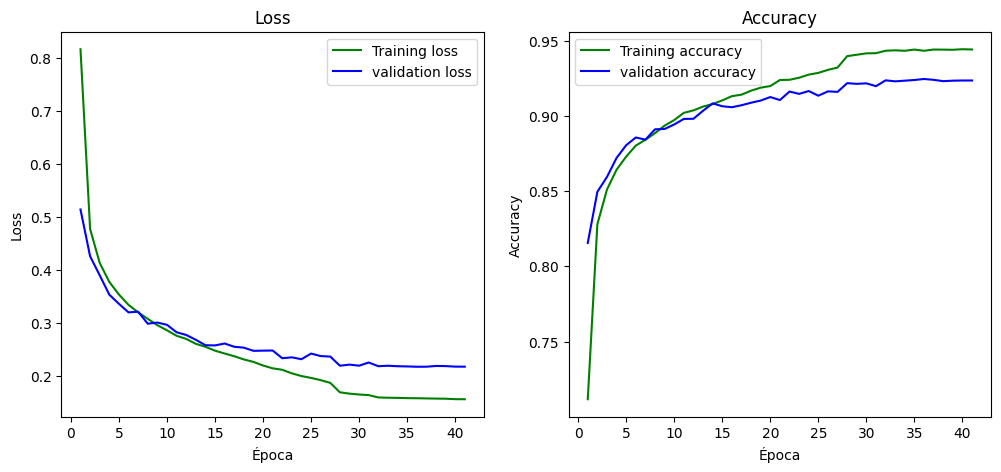

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']

epochs = range(1, len(history.history['loss'])+1)

fig, axs = plt.subplots(1,2,figsize=(12,5))
axs[0].plot(epochs, loss_train, 'g', label='Training loss')
axs[0].plot(epochs, loss_val, 'b', label='validation loss')
axs[0].title.set_text('Loss')
axs[0].set(xlabel="Época", ylabel="Loss")
axs[0].legend()
axs[1].plot(epochs, acc_train, 'g', label='Training accuracy')
axs[1].plot(epochs, acc_val, 'b', label='validation accuracy')
axs[1].title.set_text('Accuracy')
axs[1].set(xlabel="Época", ylabel="Accuracy")
axs[1].legend()

fig.show()

In [ ]:


# Get predictions on the test set
y_hat_cnn = model_cnn.predict(X_test)

# Convert predictions to class labels
y_pred_cnn = np.argmax(y_hat_cnn, axis=1)

# Calculate loss (categorical crossentropy) - need to manually calculate from predicted probabilities and true one-hot labels
# We use y_test (one-hot encoded) for loss calculation
loss_cnn = model_cnn.evaluate(X_test, y_test, verbose=0)[0]

# Calculate accuracy - compare predicted class labels with true class labels (using y_test_classes)
from sklearn.metrics import accuracy_score
accuracy_cnn_score = accuracy_score(y_test_classes, y_pred_cnn)

print(f"Pérdida (Loss) en el conjunto de prueba: {loss_cnn:.4f}")
print(f"Precisión (Accuracy) en el conjunto de prueba: {accuracy_cnn_score:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Pérdida (Loss) en el conjunto de prueba: 0.2405
Precisión (Accuracy) en el conjunto de prueba: 0.9135


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


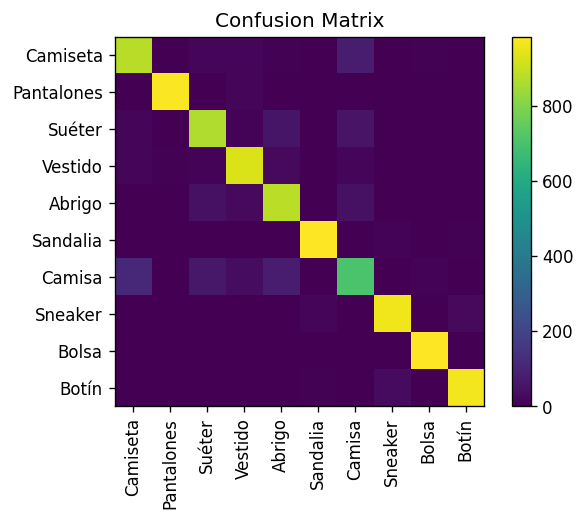

In [ ]:
from sklearn.metrics import confusion_matrix

y_hat_cnn = model_cnn.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_hat_cnn, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4),dpi=120)
plt.imshow(conf_matrix)
plt.xticks(list(prendas.keys()),list(prendas.values()), rotation=90, ha='center')
plt.yticks(list(prendas.keys()),list(prendas.values()))
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

# ⭕ Práctica 3: Predicción de edad

En este dataset usarás una red CNN para un problema de regresión con imágenes. El problema consiste en predecir la edad de individuos a partir de una imagen de sus rostros. Para esto, usaremos una versión preprocesada del dataset UTKFace.

[Fuente del dataset](https://www.kaggle.com/datasets/moritzm00/utkface-cropped/data)

🟢 Descargar el dataset

In [1]:
!gdown 1GWgB_91PuHRjzorZpTUZxRbeIW85TlbZ

Downloading...
From (original): https://drive.google.com/uc?id=1GWgB_91PuHRjzorZpTUZxRbeIW85TlbZ
From (redirected): https://drive.google.com/uc?id=1GWgB_91PuHRjzorZpTUZxRbeIW85TlbZ&confirm=t&uuid=ce9a44f3-e24a-4bb6-816b-d57fdf122e7f
To: /content/UTKFace_dataset.zip
100% 130M/130M [00:01<00:00, 80.9MB/s]


🟢 Descomprimir el dataset

In [2]:
from zipfile import ZipFile

with ZipFile('UTKFace_dataset.zip', 'r') as zipObj:
   zipObj.extractall()
print("Extracción finalizada")

Extracción finalizada


In [3]:
#@title Clase para un generador con etiquetas continuas

import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class AgeRegressionGenerator(tf.keras.utils.Sequence):
    def __init__(self, directory, datagen=None, batch_size=32, target_size=(224, 224), shuffle=True):
        self.directory = directory
        self.datagen = datagen
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle

        # Solo guardar nombres de archivos y edades, NO las imágenes
        self.filenames = []
        self.ages = []

        for filename in os.listdir(directory):
            if filename.endswith('.jpg'):
                age = int(filename.split('_')[0])
                self.filenames.append(filename)
                self.ages.append(age)

        self.indices = np.arange(len(self.filenames))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.filenames) / self.batch_size))

    def __getitem__(self, index):
        # Calcular índices del batch
        start = index * self.batch_size
        end = min((index + 1) * self.batch_size, len(self.filenames))
        batch_indices = self.indices[start:end]

        # Cargar solo las imágenes de este batch
        batch_x = np.zeros((len(batch_indices), *self.target_size, 3), dtype=np.float32)
        batch_y = np.zeros(len(batch_indices), dtype=np.float32)

        for i, idx in enumerate(batch_indices):
            # Cargar imagen solo cuando se necesita
            img_path = os.path.join(self.directory, self.filenames[idx])
            img = Image.open(img_path).convert('RGB')
            img = img.resize(self.target_size)
            img_array = np.array(img, dtype=np.float32)

            # Aplicar transformaciones si existe datagen
            if self.datagen:
                img_array = self.datagen.random_transform(img_array)
                img_array = self.datagen.standardize(img_array)
            else:
                img_array = img_array / 255.0

            batch_x[i] = img_array
            batch_y[i] = self.ages[idx]

        return batch_x, batch_y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)




🟢 Definimos los generadores de imágenes

In [4]:
# Definimos las rutas de los archivos

base_path = "UTKFace"

train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
val_path = os.path.join(base_path, 'val')

# Crear generadores
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2]
    )

train_generator = AgeRegressionGenerator(
    train_path,
    datagen=train_datagen,
    batch_size=32,
    shuffle=True
    )

val_generator = AgeRegressionGenerator(
    val_path,
    datagen=None,  # Sin aumento para validación
    batch_size=32,
    shuffle=False # Sin reordenar en cada pasada
    )

test_generator = AgeRegressionGenerator(
    test_path,
    datagen=None, # Sin aumento para prueba
    batch_size=32,
    shuffle=False # Sin reordenar en cada pasada
    )

# Longitud de los generadores
print(f"Train batches: {len(train_generator)}")
print(f"Val batches: {len(val_generator)}")
print(f"Test batches: {len(test_generator)}")

Train batches: 519
Val batches: 112
Test batches: 112


🟢 Veamos algunos ejemplos y la forma de cada lote salido del generador

Batch shape: (32, 224, 224, 3), Ages shape: (32,)
Sample ages: [50. 27.  2. 73. 22.]


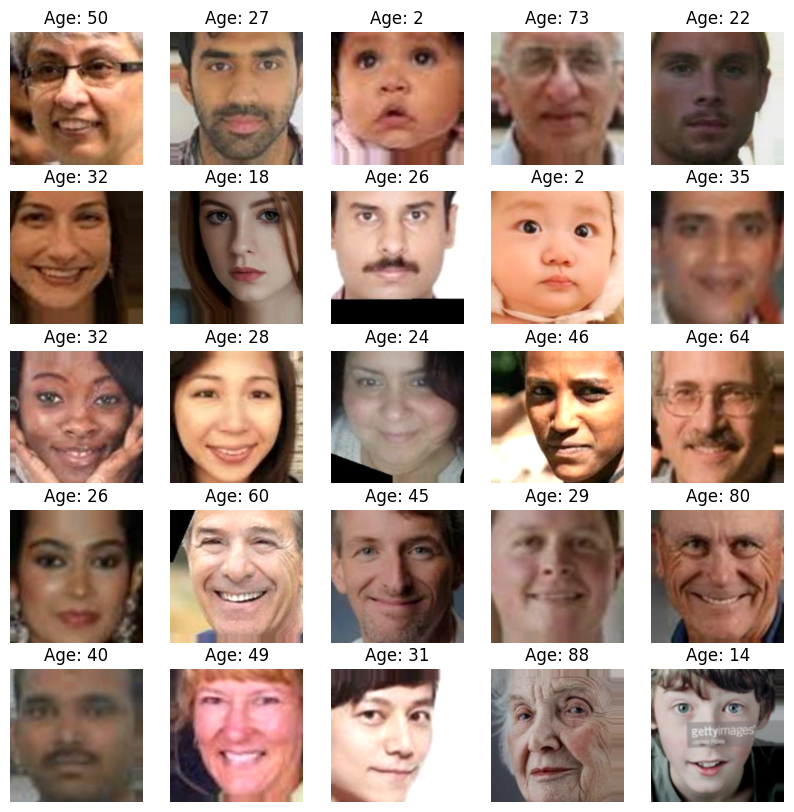

In [7]:
import matplotlib.pyplot as plt

sample_x, sample_y = train_generator[0]
print(f"Batch shape: {sample_x.shape}, Ages shape: {sample_y.shape}")
print(f"Sample ages: {sample_y[:5]}")

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_x[i])
    plt.title(f"Age: {int(sample_y[i])}")
    plt.axis('off')
plt.show()

🔴 Define una red convolucional para este problema. Usa la función de perdida `mse` y la métrica `mae`.

La entrada de la red serán tensores $224\times 224\times 3$.

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(32, 3, activation='relu', padding='same', strides=1))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation='relu', padding='same', strides=1))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, activation='relu', padding='same', strides=1))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

# model.summary()

🔴 Compila el modelo e imprime el `summary()`

In [8]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,561 (49.36 MB)

 Trainable params: 12,938,561 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

🔴 Incluye un callback `EarlyStopping`. Elige los hiperparámetros que consideres

In [9]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True
                               )

🔴 Realiza el entrenamiento durante un número de épocas que consideres apropiado. Usa `validation_steps=val_steps`. Usa un callback EarlyStopping.

El objetivo es que el modelo no haga overfitting.

In [10]:
val_steps = len(val_generator) // 4

# Entrenar modelo
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=val_generator,
                    validation_steps=val_steps,
                    callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 242s 451ms/step - loss: 483.4128 - mae: 16.8339 - val_loss: 281.0963 - val_mae: 12.6575
Epoch 2/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 230s 443ms/step - loss: 275.9915 - mae: 12.8534 - val_loss: 282.1978 - val_mae: 12.4109
Epoch 3/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 322s 560ms/step - loss: 249.5686 - mae: 12.1674 - val_loss: 235.9186 - val_mae: 11.4549
Epoch 4/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 261s 504ms/step - loss: 230.4100 - mae: 11.6468 - val_loss: 211.7532 - val_mae: 11.4479
Epoch 5/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 231s 445ms/step - loss: 222.6715 - mae: 11.3999 - val_loss: 196.6911 - val_mae: 10.5647
Epoch 6/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 231s 444ms/step - loss: 220.9996 - mae: 11.3233 - val_loss: 187.8852 - val_mae: 10.5741
Epoch 7/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 262s 505ms/step - loss: 204.4247 - mae: 10.8567 - val_loss: 178.1705 - val_mae: 10.1377
Epoch 8/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 262s 504ms/step - loss: 194.7287 - mae: 10.5982 - val_lo

🟢 Muestra las curvas de perdida y métrica

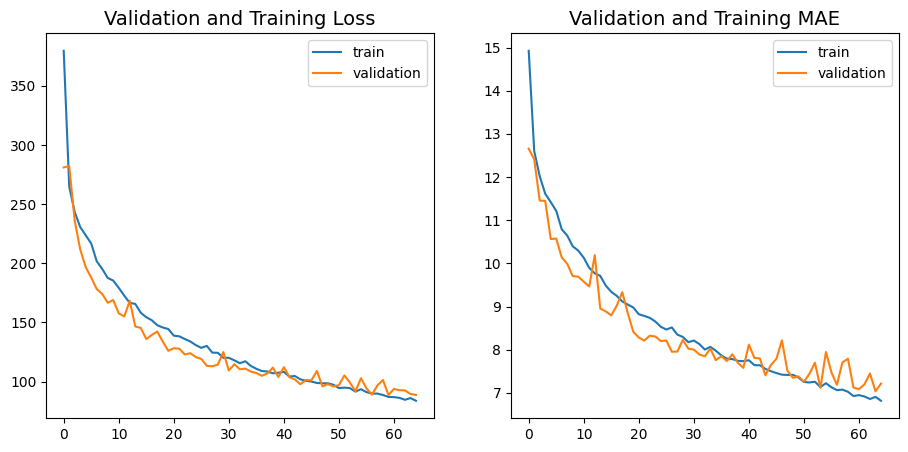

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
plt.title("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title("Validation and Training MAE",fontsize=14)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='validation')
plt.legend()

plt.show()

🟢 Salva el modelo

In [12]:
# Guardar modelo
model.save('nombre_del_modelo.keras')

🔴 Evalua el modelo en el conjunto de prueba con el método `evaluate` del modelo.

In [13]:
loss_test, mae_test = model.evaluate(test_generator)

print(f"Pérdida (MSE) en el conjunto de prueba: {loss_test:.4f}")
print(f"Error Absoluto Medio (MAE) en el conjunto de prueba: {mae_test:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 85.4480 - mae: 6.8535
Pérdida (MSE) en el conjunto de prueba: 85.3280
Error Absoluto Medio (MAE) en el conjunto de prueba: 6.8111


🟢 Grafica las predicciones contra las edades reales para visualizar los errores

112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step


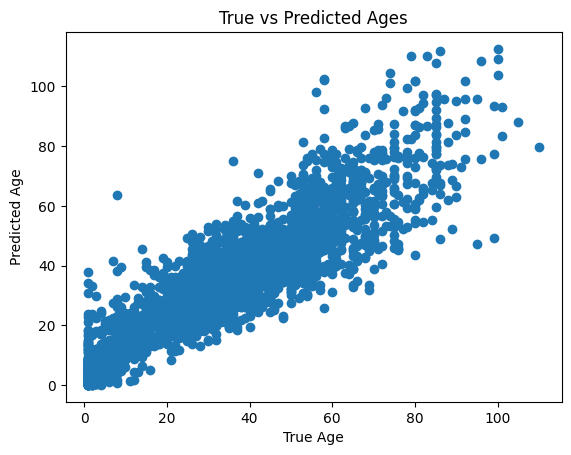

In [14]:
import matplotlib.pyplot as plt

y_test = np.array(test_generator.ages)
y_pred = model.predict(test_generator)

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("True vs Predicted Ages")
plt.show()

🔴 **OPCIONAL**: Toma alguna fotografía tuya o de quién prefieras y pasala por el modelo para que prediga la edad.

Puedes probar con tu modelo entrenado. Otra opción es probar con un modelo que ya he entrenado, en cuyo caso, descomenta las líneas de la siguiente celda.

In [ ]:
from keras.models import load_model

# !gdown 1mnRGVMqRh0-0u7YRLpEws6iO5RCLgLoZ

# model = load_model('age_regression_model.keras')
# model.summary()

Función para hacer predicciones de edad con el modelo

In [ ]:
def predict_age(model, img_path, img_size=(224, 224)):
    """Predecir edad de una imagen"""
    image = Image.open(img_path).convert('RGB')
    image = image.resize(img_size)
    img_array = np.array(image, dtype=np.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predicted_age = model.predict(img_array)[0][0]
    return predicted_age

Especifica la ruta de la imagen. Puedes subirla a la sección de archivos de colab

In [ ]:
img_path = '...ruta_del_archivo...'

In [ ]:
predicted_age = predict_age(model, img_path)
print(f"Edad predicha: {predicted_age:.1f} años")